# Vniřní statické účinky - Šwedlerovy věty (☕☕)

Metoda řezu je snadná, ale v případě obecného zatížení, které je popsané nějakou funkcí $q(x)$, se stane rychle komplikovanou (výpočet těžiště uřízlé oblasti a obsah).

<p align="center">
<img src="obrazky/prednaska07/swedlerovy_vety_nakres.png" width=500/>
</p>

podle počtu stupňů volnosit zavedeme posouvající sílu $N$, která je popisuje podélnou sílu v tělese. Dále zavedeme tečnou sílu $Q$, která popisuje střižnou sílu a nakonec ohybový moment $M$. Kladný směr volíme libovolně(opět platí, že musíme dodržovat po celý výpočet), ale doporučeno je zavádět orientaci podle obrázku. Pro známé spojité zatížení $q_x(x)$ nebo $q_z(x)$ vyřízněme nekonečně malý úsek a zaveďmě VSU podle zvyku. Silové rovnice rovnováhy pro $N$ a $Q$ vedou na diferenciální rovnici prvního řádu

<p align="center">
<img src="obrazky/prednaska07/sily_vztah.png" width=600/>
</p>

Podobnou úvahu aplikujme pro výpočet momentové rovnice rovnováhy. Z obrázku je patrné, že násobení dvou malých členů ($dQdx$) budeme uvažovat za velmi malý přírustek a tak ho zanedbáme. Z momentové rovnice opět získáme diferenciální rovnici pro moment.

<p align="center">
<img src="obrazky/prednaska07/moment_vztah.png" width=600/>
</p>

Je zřejmé, že mezi zatížením, silami a momentem existují vztahy, které popisují Šwedlerovy věty. Nalezené diferenciální rovnice lze řešit prostou separací proměnných a integrací, viz. následující příklad.


## Příklad
Nalezněte průběh posouvající síly $N$, tečné síly $Q$ a ohybového momentu $M$ pro nosník uložený a zatížený podle obrázku:

<p align="center">
<img src="obrazky/prednaska07/priklad02_zadani.png" width=400/>
</p>

Konstanta zatížení $q_0$=5 N/m a vzdálenost podpor $L$=1 m.

## Řešení
Nejdříve nosník uvolníme a napíšeme rovnice rovnováhy:

<p align="center">
<img src="obrazky/prednaska07/priklad02_uvolneni.png" width=400/>
</p>

$$
\begin{align}
\overrightarrow{x}:& R_{Ax} =0  \\
y\uparrow:& R_{Ay} + R_{By} - \frac{Lq_0}{2}=0 \\
\overset{\curvearrowleft}{+M}: & R_{By}L - \frac{Lq_0}{2}\frac{2}{3}L=0 
\end{align}
$$

In [1]:
import sympy as sp
q0, L = sp.symbols('q0 L')
RAx, RAy, RBy = sp.symbols('RAx RAy RBy')

In [2]:
eq1 = sp.Eq(RAx, 0)
eq2 = sp.Eq(RAy + RBy - L * q0 / 2, 0)
eq3 = sp.Eq(RBy * L - L * q0 / 2 * 2 / 3 * L, 0)

In [3]:
reseni = sp.solve([eq1, eq2, eq3], [RAx, RAy, RBy])
RAx = reseni[RAx]
RAy = reseni[RAy]
RBy = reseni[RBy]

In [4]:
sp.pprint(RAx)
sp.pprint(RAy)
sp.pprint(RBy)

0
L⋅q₀
────
 6  
L⋅q₀
────
 3  


### Aplikace Šwedlerovy věty

nejdříve definujeme funkční předpis pro zatížení:

$$
\begin{equation}
q(x) = \frac{q_0}{L}x
\end{equation}
$$

In [5]:
x = sp.symbols('x')
Q = sp.symbols('Q', cls=sp.Function) # jako funkce
q = q0 / L * x

vztah zatížení $q(x)$ a tečné síly $Q(x)$ (diff. rovnice):

$$
\begin{equation}
\frac{dQ(x)}{dx} = - q(x)
\end{equation}
$$

Řešením je:

$$
\begin{equation}
\int dQ(x) = -\int q(x)dx
\end{equation}
$$

In [6]:
drQ = sp.Eq(Q(x).diff(x), -q) # differencialni rovnice

In [7]:
res = sp.dsolve(drQ) # reseni differencialni rovnice
sp.pprint(res)

                2
            q₀⋅x 
Q(x) = C₁ - ─────
             2⋅L 


konstantu $C_1$ neznáme, ale umíme jí spočítat ze znalostí reakcí $R$:

$$
\begin{equation}
    Q(x=0) = R_{Ay} = C_1 \xrightarrow{} C_1= \frac{L q_0}{6}
\end{equation}
$$

po dosazení $C_1$, vidíme, že tečná síla $Q(x)$ má předpis:

$$
\begin{equation}
Q(x) = \frac{Lq_0}{6} - \frac{q_0}{2L}x^{2}
\end{equation}
$$

In [8]:
import numpy as np
L = 1.
q0 = 5.
x = np.linspace(0, L, 10)

In [9]:
Qnum = L * q0 / 6. - q0 * x ** 2 / (2 * L)

### Nalezení momentu $M$

vztah tečné síly $Q(x)$ a momentu $M(x)$ (diff. rovnice):

$$
\begin{equation}
\frac{dM(x)}{dx} = Q(x)
\end{equation}
$$

In [10]:
M = sp.symbols('M', cls=sp.Function) # jako funkce
L, q0, x = sp.symbols('L q0 x') # sme si je prepsali na numeriku
Q = L * q0 / 6. - q0 * x ** 2 / (2 * L)

Řešením je:

$$
\begin{equation}
\int dM(x) = \int Q(x)dx = \int\Big(\frac{Lq_0}{6} - \frac{q_0}{2L}x^{2}\Big)dx
\end{equation}
$$

In [11]:
drM = sp.Eq(M(x).diff(x), Q) # differencialni rovnice

In [12]:
res = sp.dsolve(drM) # reseni differencialni rovnice
sp.pprint(res)

                 ⎛ 2    2⎞
            q₀⋅x⋅⎝L  - x ⎠
M(x) = C₁ + ──────────────
                 6⋅L      


konstantu $C_1$ neznáme, ale umíme jí spočítat ze znalostí reakcí $M$:

$$
\begin{equation}
    M(x=0) = 0 = C_1 \xrightarrow{} C_1= 0
\end{equation}
$$

In [13]:
L = 1.
q0 = 5.
x = np.linspace(0, L, 10)
Mnum = q0 * x * (L ** 2 - x ** 2) / (6 * L)

Text(0, 0.5, 'M(x)')

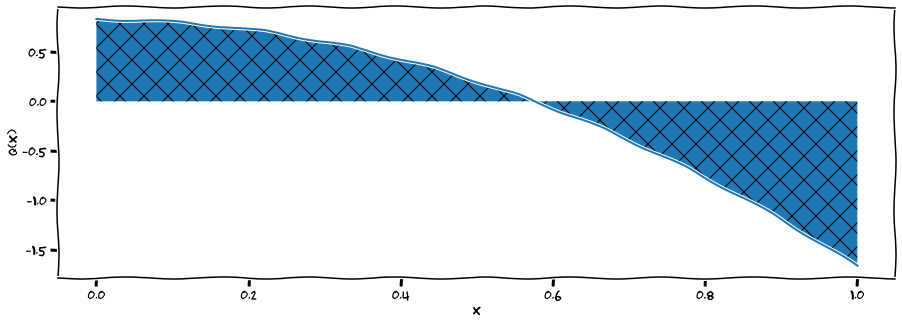

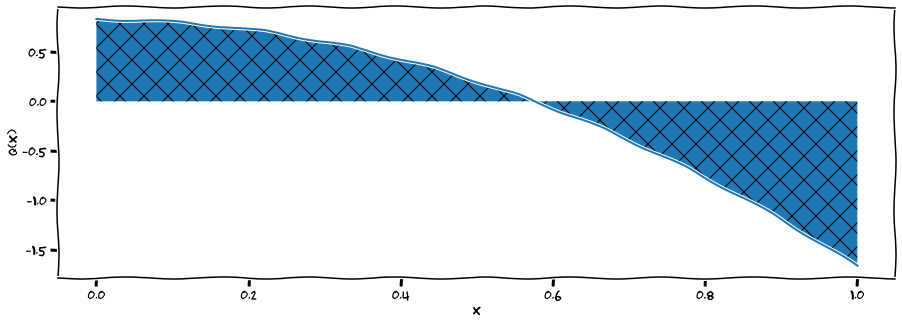

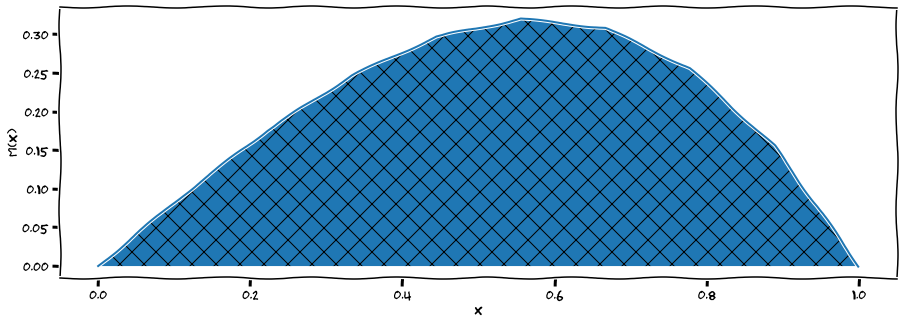

In [14]:
import matplotlib.pylab as plt
plt.xkcd()
#nastavime velikost obrazku
fig, ax0 = plt.subplots(figsize=(15, 5))
q = q0 / L * x
ax0.fill_between(x, Qnum, hatch="X", label="Q(x)");
ax0.plot(x, Qnum)
ax0.set_xlabel('x')
ax0.set_ylabel('Q(x)')
#nastavime velikost obrazku
fig, ax1 = plt.subplots(figsize=(15, 5))

ax1.fill_between(x, Qnum, hatch="X", label="Q(x)");
ax1.plot(x, Qnum)
ax1.set_xlabel('x')
ax1.set_ylabel('Q(x)')

fig, ax2 = plt.subplots(figsize=(15, 5))
ax2.fill_between(x, Mnum, hatch="X", label="M(x)");
ax2.plot(x, Mnum) # podle definice swed. vety, + znamenko y dolu
ax2.set_xlabel('x')
ax2.set_ylabel('M(x)')

In [15]:
Q

0.166666666666667*L*q0 - q0*x**2/(2*L)